In [14]:
from qiskit.circuit import Parameter, QuantumCircuit, ParameterVector
from qiskit.tools.visualization import *
from qiskit import Aer, execute

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles

In [3]:
theta = Parameter(name="theta")

theta

Parameter(theta)

In [6]:
q_1 = QuantumCircuit(2)
q_1.rx(theta=theta, qubit=0)
q_1.crx(theta=theta, control_qubit=0, target_qubit=1)
q_1.draw()

┌───────────┐             
q_0: ┤ Rx(theta) ├──────■──────
     └───────────┘┌─────┴─────┐
q_1: ─────────────┤ Rx(theta) ├
                  └───────────┘

In [12]:
thetas_list = ParameterVector(name="thetas", length=2)

thetas_list

ParameterVector(name=thetas, length=2)

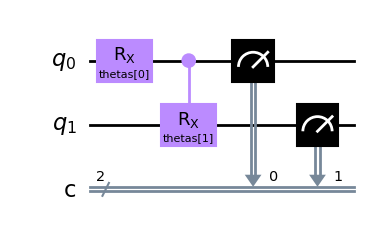

In [13]:
q2= QuantumCircuit(2,2)
q2.rx(theta=thetas_list[0], qubit=0)
q2.crx(theta=thetas_list[1], control_qubit=0, target_qubit=1)
q2.measure([0,1], [0,1])
q2.draw(output='mpl')

In [88]:
thetas_list[0].name

'thetas[0]'

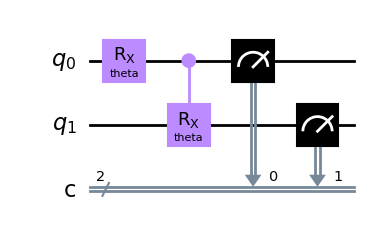

In [89]:
qc= QuantumCircuit(2,2)
qc.rx(theta=theta, qubit=0)
qc.crx(theta=theta, control_qubit=0, target_qubit=1)
qc.measure([0,1], [0,1])
qc.draw(output='mpl')

In [90]:
theta_values = np.linspace(0, 2*np.pi, 500)


circuits = [qc.bind_parameters(values={theta : theta_val}) for theta_val in theta_values]


len(circuits)

500

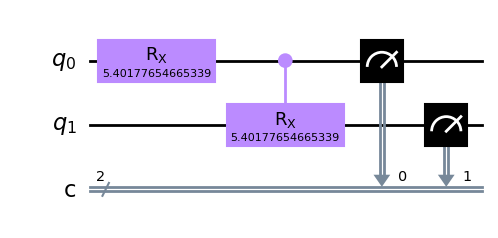

In [97]:
circuits[429].draw(output='mpl')

In [98]:
sim = Aer.get_backend('qasm_simulator')
job = execute(circuits[470], backend=sim, shots=5000)
result = job.result()

print(result)

Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='37ad7145-6b72-429e-b88e-44eb23f06df7', job_id='0b787e98-c59a-415e-8456-c7e553c203c2', success=True, results=[ExperimentResult(shots=5000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 4844, '0x1': 154, '0x3': 2}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-641', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=420577079, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0099626, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 4, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': Fals

In [100]:
counts = result.get_counts()

counts

{'00': 4844, '01': 154, '11': 2}

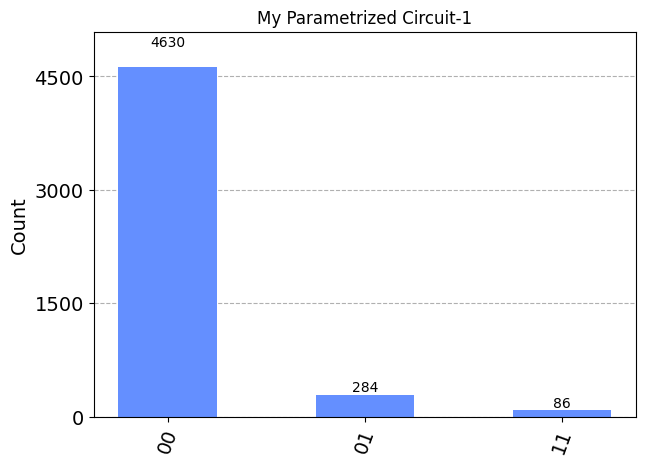

In [24]:
plot_histogram(data=counts, title="My Parametrized Circuit-1")

In [27]:
from qiskit import IBMQ

In [28]:
my_account = IBMQ.load_account()

In [29]:
providers = IBMQ.providers()

providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='qc-fall-22-4', group='group-2', project='reccJllCp9LvoLf6u')>]

In [30]:
my_real_backends = providers[0].backends()

my_real_backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [51]:
my_real_backends[-1].name()

'ibm_oslo'

In [47]:
my_real_backends[-1].status().operational

True

In [54]:
import time
for i in range(len(my_real_backends)):
    print(f"--------------------- Name: {my_real_backends[i].name()} ---------------------------")
    for j in range(3):
        print("second-" + str(j+1))
        print("\t\t   Pending jobs:", my_real_backends[i].status().pending_jobs)
        time.sleep(1)
    print("----------------------------------------------------------------------------\n")

--------------------- Name: ibmq_qasm_simulator ---------------------------
second-1
		   Pending jobs: 1
second-2
		   Pending jobs: 1
second-3
		   Pending jobs: 1
----------------------------------------------------------------------------

--------------------- Name: ibmq_lima ---------------------------
second-1
		   Pending jobs: 4
second-2
		   Pending jobs: 4
second-3
		   Pending jobs: 4
----------------------------------------------------------------------------

--------------------- Name: ibmq_belem ---------------------------
second-1
		   Pending jobs: 4
second-2
		   Pending jobs: 4
second-3
		   Pending jobs: 4
----------------------------------------------------------------------------

--------------------- Name: ibmq_quito ---------------------------
second-1
		   Pending jobs: 7
second-2
		   Pending jobs: 7
second-3
		   Pending jobs: 7
----------------------------------------------------------------------------

--------------------- Name: simulator_statevector --

In [59]:
pending_jobs_dict = {}
for i in range(len(my_real_backends)):
    pending_jobs_dict.update({my_real_backends[i].name() : my_real_backends[i].status().pending_jobs})

print(pending_jobs_dict)

{'ibmq_qasm_simulator': 1, 'ibmq_lima': 4, 'ibmq_belem': 4, 'ibmq_quito': 10, 'simulator_statevector': 1, 'simulator_mps': 1, 'simulator_extended_stabilizer': 1, 'simulator_stabilizer': 1, 'ibmq_manila': 0, 'ibm_nairobi': 33, 'ibm_oslo': 14}


In [58]:
pending_jobs = []
for i in range(len(my_real_backends)):
    pending_jobs.append(my_real_backends[i].status().pending_jobs)

print(min(pending_jobs))

1


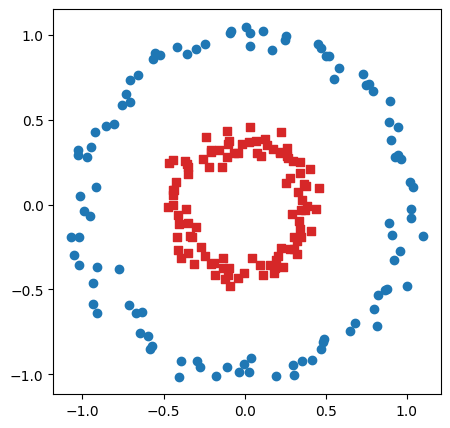

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles

# Create circles dataset
X, Y = make_circles(n_samples=200, noise=0.05, factor=0.4)

# Separate smaller and larger circles
A = X[np.where(Y==0)]
B = X[np.where(Y==1)]

# Plot in 2D
plt.figure(figsize=(5,5))
plt.scatter(A[:,0],A[:,1], marker='o')
plt.scatter(B[:,0],B[:,1], marker='s', c='C3')
plt.show()

In [76]:
b = my_real_backends[-3]

b

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [61]:
from qiskit import transpile

In [101]:
transpiled_parametrized_circuit = transpile(circuits=circuits[470], basis_gates=['rx', 'crx'])

transpiled_parametrized_circuit.draw()

┌──────────────────────┐                        ┌─┐   
q_0: ┤ Rx(5.91803024924731) ├───────────■────────────┤M├───
     └──────────────────────┘┌──────────┴───────────┐└╥┘┌─┐
q_1: ────────────────────────┤ Rx(5.91803024924731) ├─╫─┤M├
                             └──────────────────────┘ ║ └╥┘
c_0: ═════════════════════════════════════════════════╩══╬═
                                                         ║ 
c_1: ════════════════════════════════════════════════════╩═

In [77]:
b

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [70]:
from qiskit.providers.models import backendconfiguration

In [102]:
# from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, NLocal

# from qiskit.utils import QuantumInstance
# from qiskit_machine_learning.neural_networks import CircuitQNN

In [103]:
my_job = b.run(transpiled_parametrized_circuit)

my_result= my_job.result()

my_counts = my_result.get_counts()

print(my_counts)

IBMQJobFailureError: "Unable to retrieve result for job 63bac4a8fd03a41123219f76. Job has failed: The Qobj uses gates (['rx', 'crx']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

In [67]:
for a, b in zip(np.ravel([1,2,3,4]), np.ravel([5,6,7,8,9])):
    print("a: ", a); print("b: ", b)

a:  1
b:  5
a:  2
b:  6
a:  3
b:  7
a:  4
b:  8


In [68]:
for a, b in zip([1,2,3,4], [5,6,7,8,9]):
    print("a: ", a); print("b: ", b)

a:  1
b:  5
a:  2
b:  6
a:  3
b:  7
a:  4
b:  8


In [69]:
for a, b in zip(range(4), range(7,11)):
    print("a: ", a); print("b: ", b)

a:  0
b:  7
a:  1
b:  8
a:  2
b:  9
a:  3
b:  10


In [79]:
import networkx as nx

In [80]:
graph = nx.Graph()

In [81]:
graph

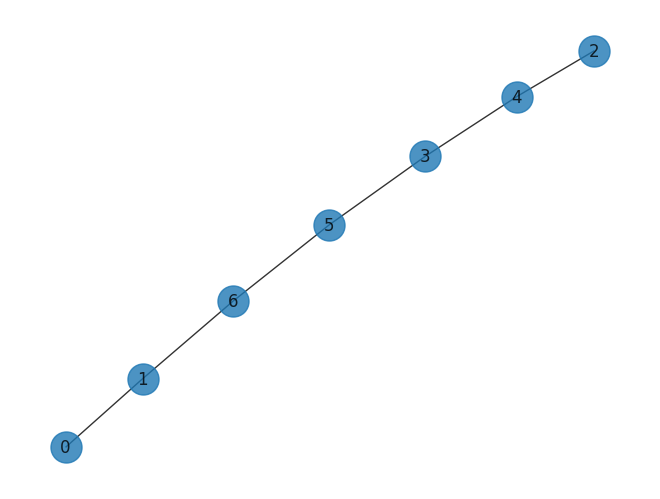

In [83]:
graph.add_nodes_from([1,2,3,4,5,6])
graph.add_edges_from([(0,1), (3,4), (2,4), (5,6), (1,6), (3,5)])
nx.draw(graph, with_labels=True, alpha=0.8, node_size=500)